In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression

In [28]:
#read the data
advertising=pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [30]:
advertising.shape

(200, 4)

In [7]:
advertising.shape

(200, 4)

In [31]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


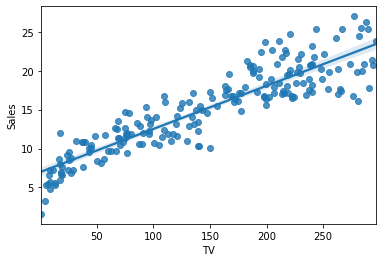

In [32]:
#visualise the data
sns.regplot(x='TV',y='Sales',data=advertising)

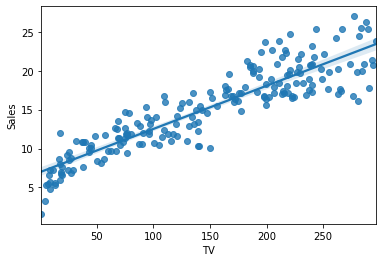

In [33]:
#visualise the data
sns.regplot(x='TV',y='Sales',data=advertising)


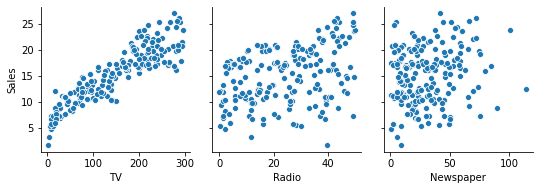

In [34]:
#visualise the data

sns.pairplot(data=advertising,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

In [16]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


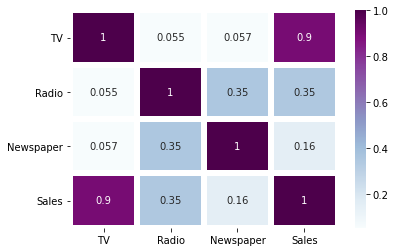

In [21]:
sns.heatmap(advertising.corr(),cmap="BuPu",linewidth=5,annot=True)

In [35]:
#create x and y
x=advertising['TV']
y=advertising['Sales']

In [36]:
#train-test-split
##70-30 split
x_train_lm, x_test_lm, y_train_lm, y_test_lm = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [28]:
advertising=pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [38]:
x_train_lm.shape


(140,)

In [39]:
x_train_lm.shape


(140,)

In [40]:
x_train_lm


74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [45]:
#training the model
x_train_sm=sm.add_constant(x_train_lm)
x_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [46]:
#fitting the model
lr=sm.OLS(y_train_lm,x_train_sm)
lr_model=lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [46]:
 lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 29 May 2020   Prob (F-statistic):           1.52e-52
Time:                        22:07:52   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Simple Linear Regression
#1.> Training the model
#2.> Residual Analysis
#3.> Predicting and evaluating on the test sets

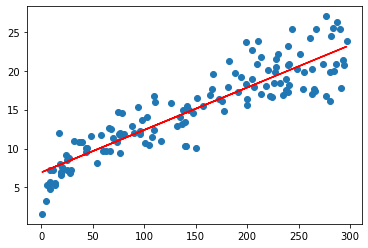

In [39]:
#training data set that we fed into the model
plt.scatter(x_train_lm,y_train_lm)
plt.plot(x_train_lm,6.948+0.0545*x_train_lm,'r')
plt.show()

In [47]:
#add a const
x_test_sm=sm.add_constant(x_test_lm)
#predict y_test
y_test_pred=lr_model.predict(x_test_sm)

In [48]:
r2=r2_score(y_true=y_test_lm,y_pred=y_test_pred)
r2

0.792103160124566

In [49]:
x_test_lm

126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
167    206.8
116    139.2
96     197.6
52     216.4
69     216.8
164    117.2
124    229.5
182     56.2
154    187.8
125     87.2
196     94.2
194    149.7
177    170.2
163    163.5
31     112.9
11     214.7
73     129.4
15     195.4
41     177.0
97     184.9
128    220.3
133    219.8
82      75.3
139    184.9
123    123.1
83      68.4
65      69.0
151    121.0
162    188.4
170     50.0
77     120.5
32      97.2
173    168.4
174    222.4
85     193.2
168    215.4
112    175.7
171    164.5
181    218.5
7      120.2
46      89.7
75      16.9
28     248.8
29      70.6
195     38.2
40     202.5
153    171.3
115     75.1
64     131.1
59     210.7
1       44.5
192     17.2
136     25.6
152    197.6
161     85.7
Name: TV, dtype: float64

In [53]:
#Residual Analysis continued
y_train_pred=lr_model.predict(x_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

Text(0.5, 1.0, 'Residual Plot')

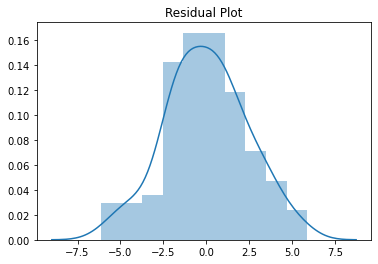

In [57]:
#Residual Analysis continued
res=y_train_lm-y_train_pred
plt.figure()
sns.distplot(res)
plt.title('Residual Plot')
#It proves that the errors are normally distributed

In [60]:
#rsquared value for training set
r2_score(y_true=y_train_lm,y_pred=y_train_pred)

0.8157933136480389

In [61]:
r2_score(y_true=y_test_lm,y_pred=y_test_pred)

0.792103160124566

In [63]:
#In general, anything within 5% indicates stability.The model can generalize it on the 
#unseen set as well
mean_squared_error(y_true=y_test_lm,y_pred=y_test_pred)

4.077556371826953

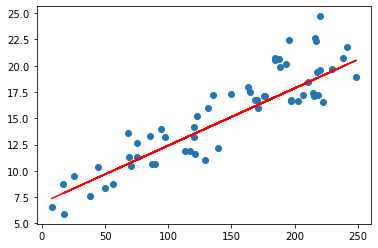

In [64]:
#Testing data set predictions
plt.scatter(x_test_lm,y_test_lm)
plt.plot(x_test_lm,6.948+0.0545*x_test_lm,'r')
plt.show()

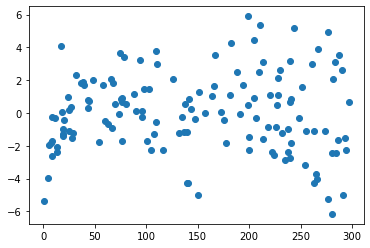

In [65]:
#qulitative analysis of residuals
#Check if there is any visible patterns
plt.scatter(x_train_lm,res)
plt.show()

In [66]:
#Linear Regression using sklearn
#train-test-split
##70-30 split
x_train_lm, x_test_lm, y_train_lm, y_test_lm = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [73]:
x_train_lm=x_train_lm.values.reshape(-1,1)
x_test_lm=x_test_lm.values.reshape(-1,1)

In [75]:
lm = LinearRegression()   # Create a linear regression object
lm.fit(x_train_lm, y_train_lm)

LinearRegression()

In [77]:
print(lm.coef_)
print(lm.intercept_)
#slope and intercept

[0.05454575]
6.948683200001357
